In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))


In [3]:
import matplotlib.pyplot as plt 
from astropy.io import fits 
import numpy as np
from scipy.ndimage import gaussian_filter1d

In [4]:
si = fits.open("scan_si.lr2000.tlc.fits")[0].data

In [5]:
si.shape

(882, 967, 1372)

In [6]:
si = si.transpose(2,0,1)
print (si.shape)

(1372, 882, 967)


In [7]:
mean = np.mean(si, axis=(0,1))

In [8]:
ll = fits.open("lambda.fits")[0].data
ll.shape

(967,)

In [9]:
stray_light = 0.03 * np.max(mean)
si -= stray_light

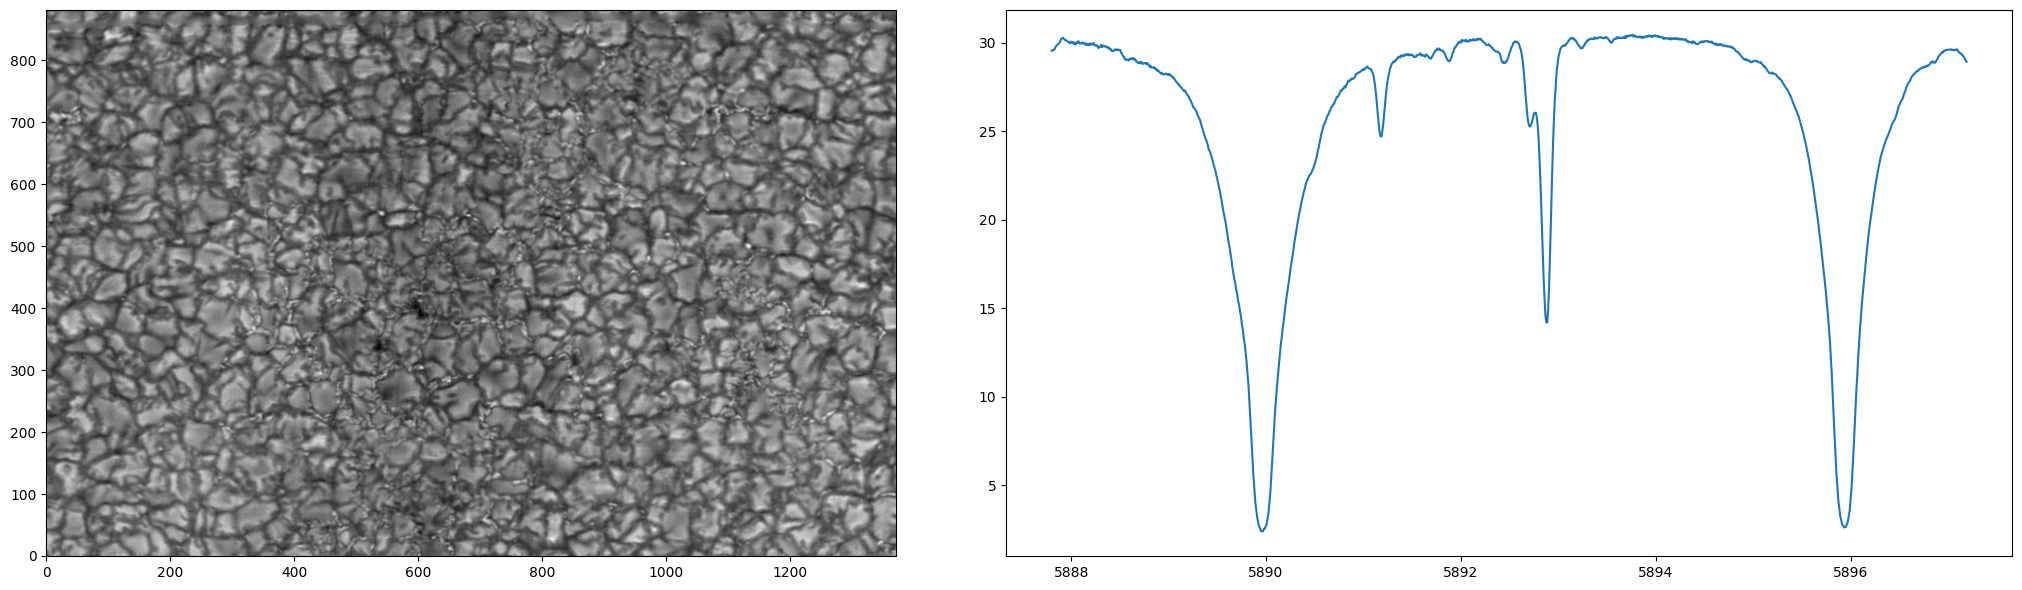

In [10]:
plt.figure(figsize=[21,6])
plt.subplot(121)
plt.imshow(si[:,:,10].T,origin='lower',cmap='grey')
plt.subplot(122)
plt.plot(ll,mean)
plt.tight_layout()

In [11]:
test = np.mean(si,axis=1)
test.shape

(1372, 967)

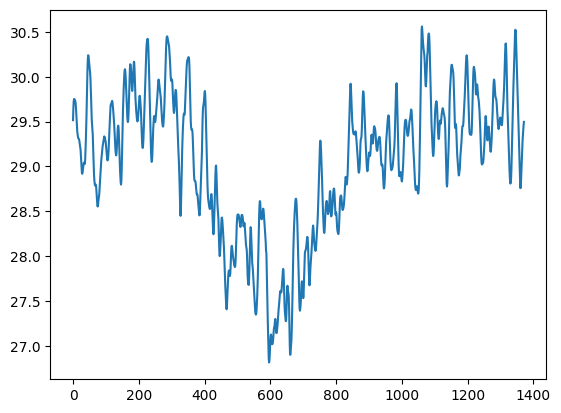

In [12]:
plt.plot(np.mean(test[:,:20],axis=1))

In [13]:
mean = np.mean(si, axis=(0,1))

In [14]:
atlas = np.loadtxt("../atlas.txt",unpack=True)

In [15]:
sigma = 0.045 / np.mean(np.gradient(ll))
print (sigma)

4.629639936304457


In [16]:
atlasc = gaussian_filter1d(atlas[1], sigma)

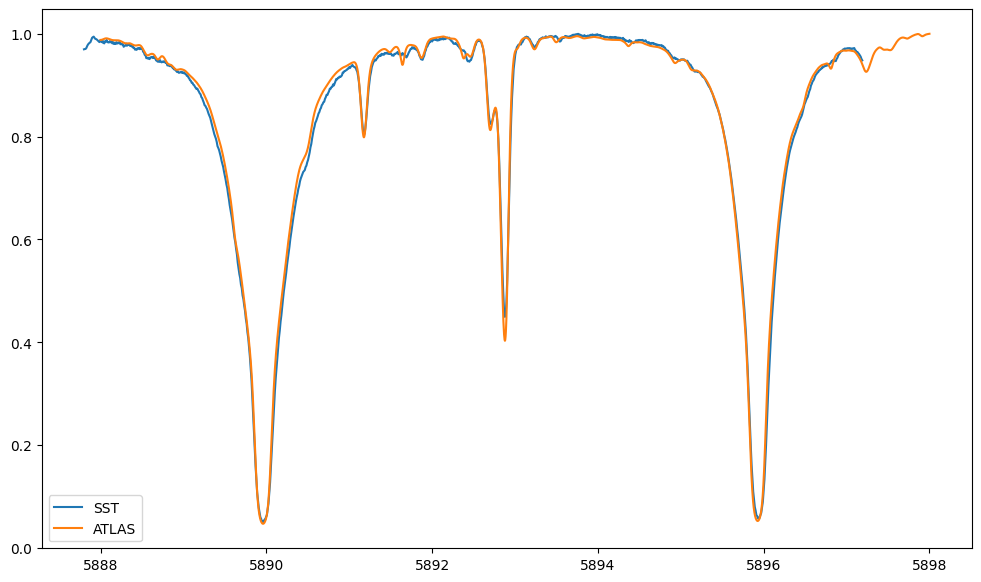

In [17]:
plt.figure(figsize=[12,7])
plt.plot(ll,mean/np.amax(mean), label='SST')
plt.plot(atlas[0],atlasc/np.amax(atlasc), label='ATLAS')
plt.legend()
#plt.xlim([5892.0, 5894.0])

In [18]:
sv = fits.open("scan_sv.lr2000.xtc.fits")[0].data

In [19]:
sv = sv.transpose(2,0,1)
sv.shape

(1372, 882, 967)

In [20]:
V = np.mean(sv[:,:,240:260],axis=2)

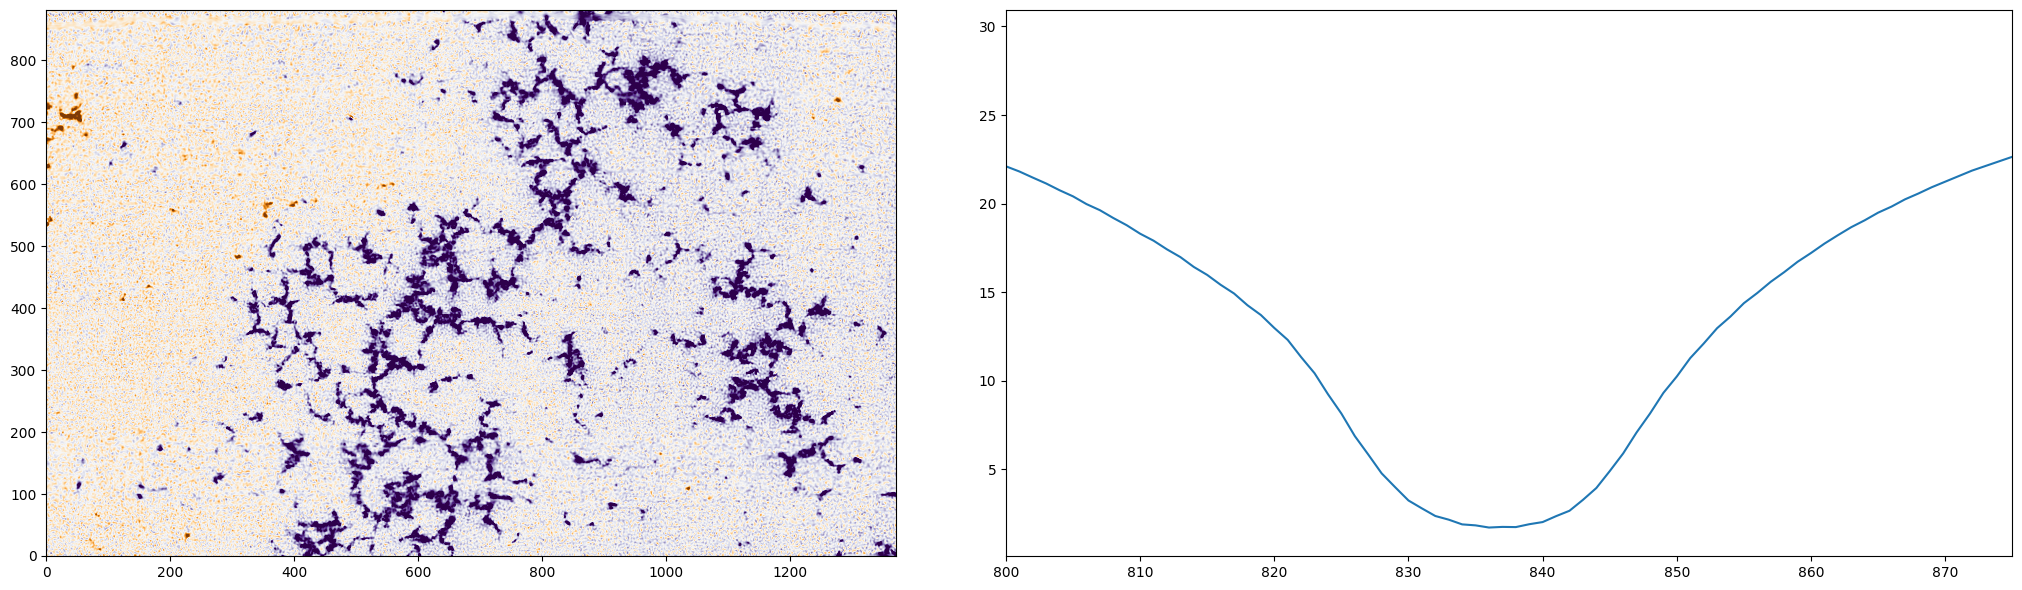

In [21]:
plt.figure(figsize=[21,6])
plt.ion()
plt.subplot(121)
plt.imshow(V.T/np.amax(mean),origin='lower',cmap='PuOr',vmin=-0.02,vmax=0.02)

plt.subplot(122)
plt.plot(mean)
plt.xlim([800,875])
plt.tight_layout()

In [22]:
sq = fits.open("scan_sq.lr2000.xtc.fits")[0].data.transpose(2,0,1)
su = fits.open("scan_su.lr2000.xtc.fits")[0].data.transpose(2,0,1)

In [23]:
sq.shape

(1372, 882, 967)

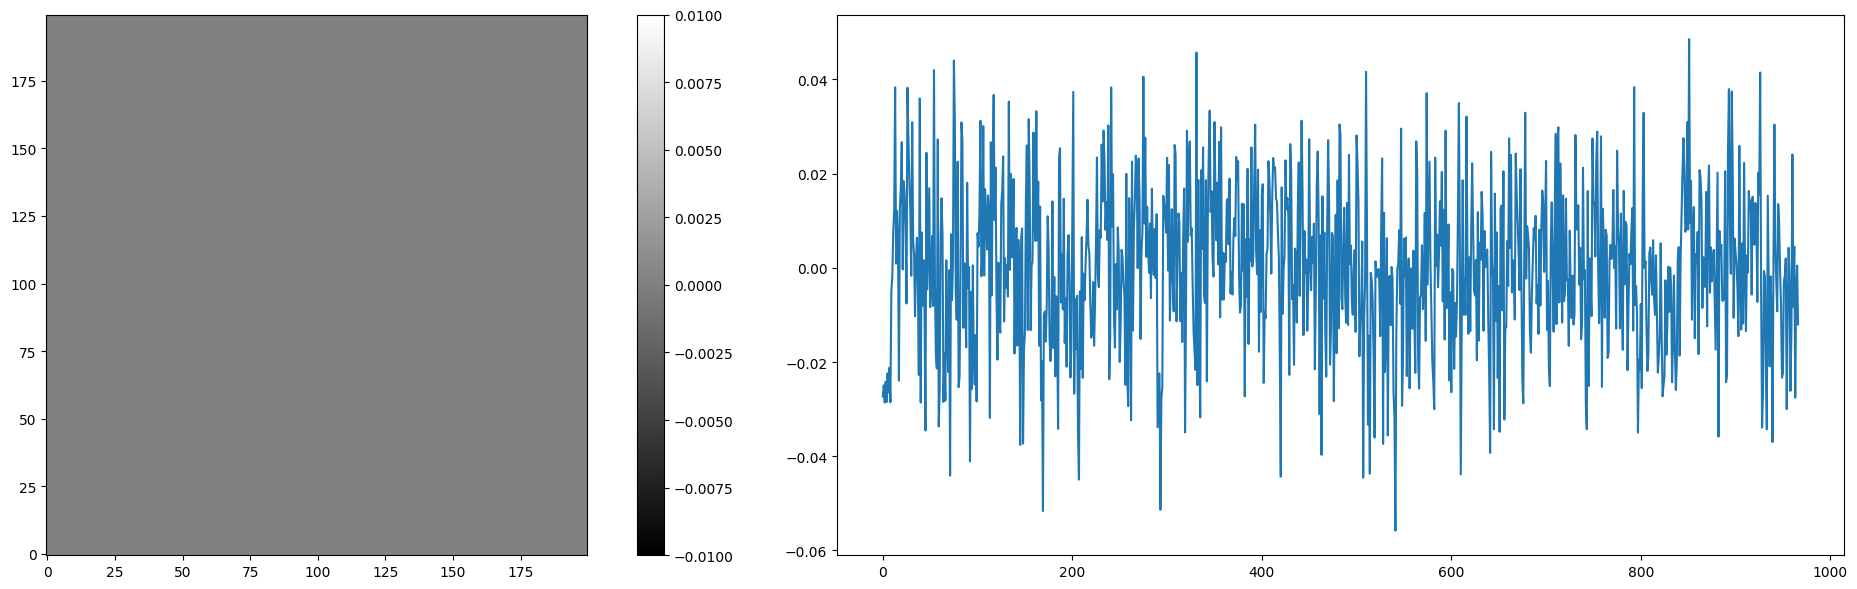

In [24]:
i = 400
irange = 200
j = 250
jrange = 200
plt.figure(figsize=[21,6])
plt.subplot(121)
#plt.imshow(sq[i:i+irange,j:j+jrange,524].T/ mean[0],origin='lower',cmap='grey',vmin=-0.01,vmax=0.01)
plt.imshow(sq[i:i+irange,j:j+jrange,524].T/ mean[0] - sq[i:i+irange,j:j+jrange,524].T/ mean[0],origin='lower',cmap='grey',vmin=-0.01,vmax=0.01)
plt.colorbar()
plt.subplot(122)
plt.plot(sq[860,313,:]/mean[0])
plt.tight_layout()

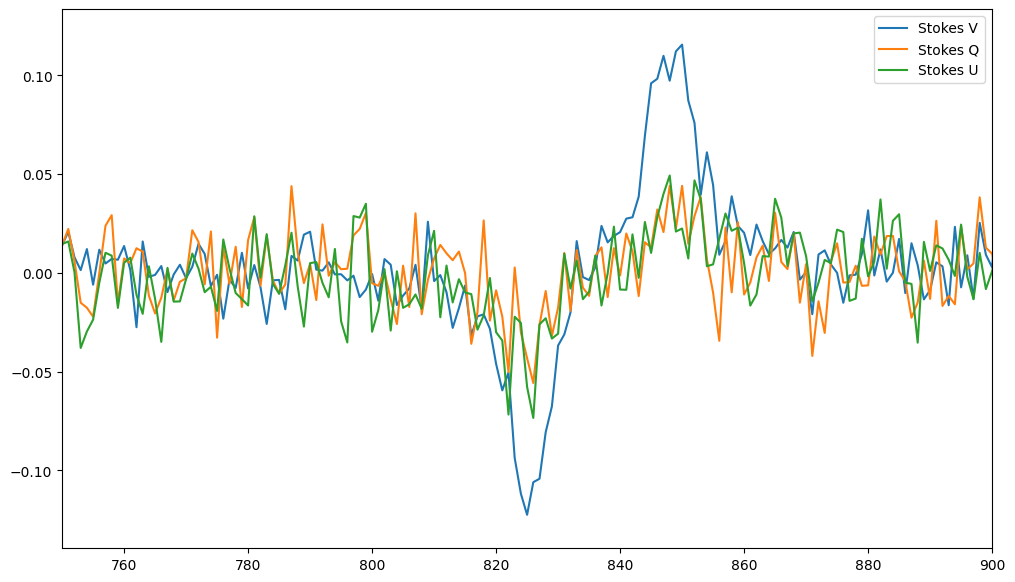

In [25]:

i = 863
j = 313
plt.figure(figsize=[12,7])
plt.plot(sv[i,j,:]/mean[0], label='Stokes V')
plt.plot(sq[i,j,:]/mean[0], label='Stokes Q')
plt.plot(su[i,j,:]/mean[0], label='Stokes U')
plt.xlim([750,900])
plt.legend()

In [26]:
# Some very basic polarimetric cross-talk correction:

avv = np.mean(sv[500:800, 300:500,:],axis=(0,1))
avq = np.mean(sq[500:800, 300:500,:],axis=(0,1))
avu = np.mean(su[500:800, 300:500,:],axis=(0,1))

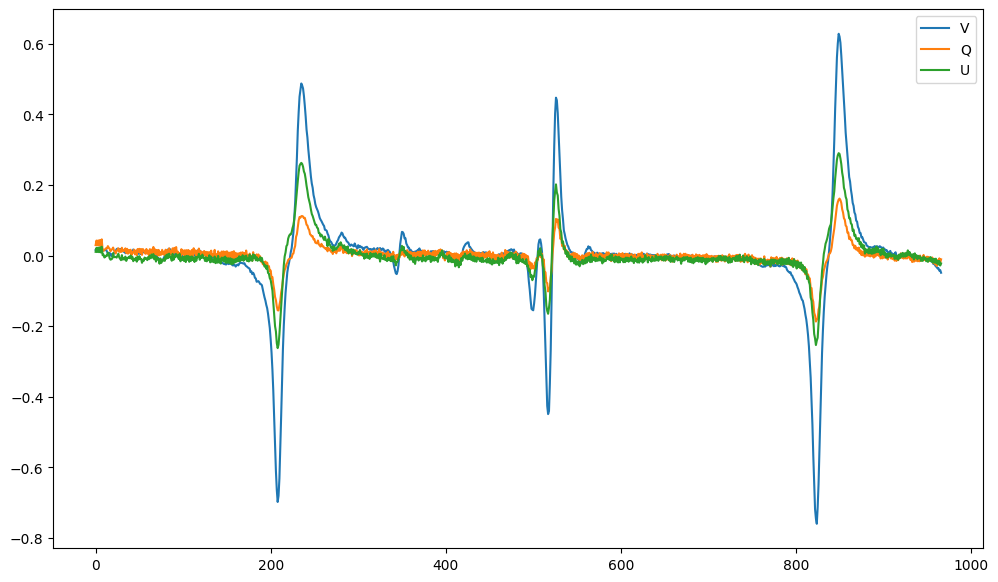

In [27]:
plt.figure(figsize=[12,7])
plt.plot(avv,label='V')
plt.plot(avq, label='Q')
plt.plot(avu, label='U')
plt.legend()

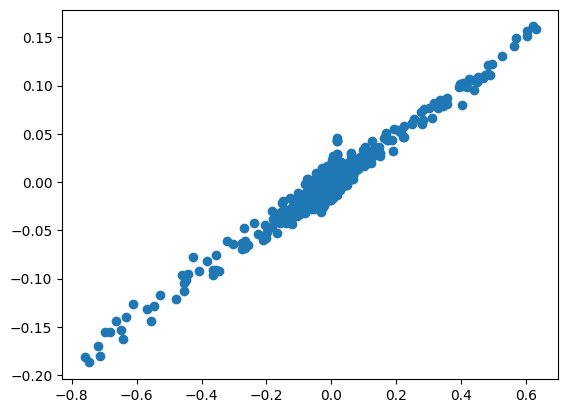

In [28]:
plt.plot(avv,avq,'o')

In [29]:
cvq, iq = np.polyfit(avv, avq, 1)
print(cvq,iq)

0.2388075081224132 8.356812368871843e-11


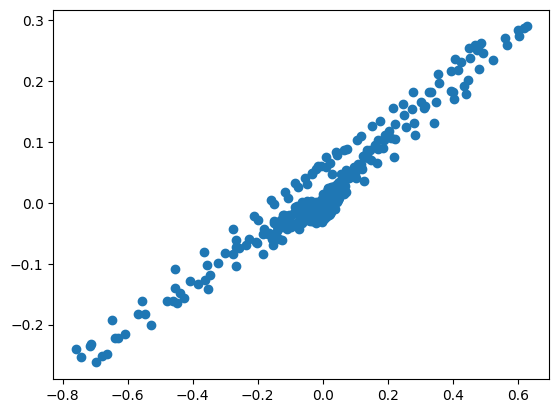

In [30]:
plt.plot(avv[:],avu[:],'o')


In [31]:
cvu, iu = np.polyfit(avv, avu, 1)
print(cvu,iu)

0.4032469325481715 -1.2930736678246372e-09


In [32]:
mask_u = np.where(np.abs(avu)> 0.05)

In [33]:
cvu, iu = np.polyfit(avv[mask_u], avu[mask_u], 1)
print(cvu,iu)

0.4077614280535785 0.034452397812048854


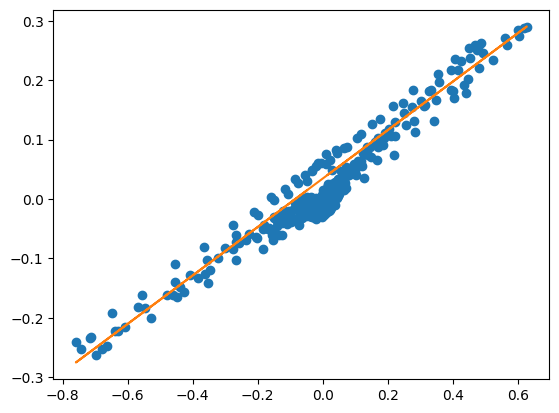

In [35]:
plt.plot(avv[:],avu[:],'o')
plt.plot(avv, avv*cvu + iu)

In [36]:
sqt = sq - cvq * sv
sut = su - cvu * sv

In [37]:
svt = sv * (1.0 + cvq + cvu)

In [38]:

avvt = np.mean(svt[500:800, 300:500,:],axis=(0,1))
avqt = np.mean(sqt[500:800, 300:500,:],axis=(0,1))
avut = np.mean(sut[500:800, 300:500,:],axis=(0,1))

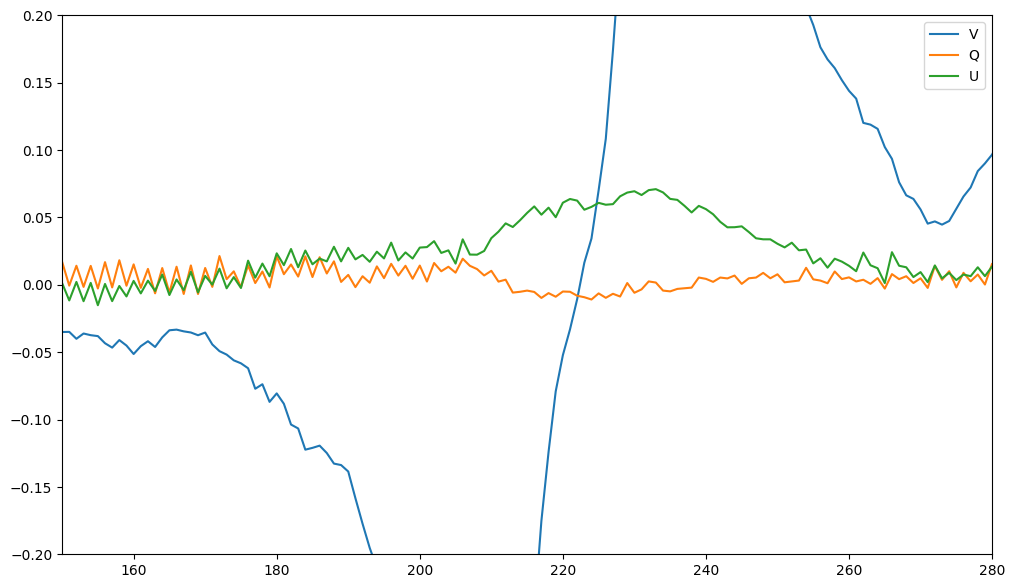

In [39]:
plt.figure(figsize=[12,7])
plt.plot(avvt,label='V')
plt.plot(avqt, label='Q')
plt.plot(avut, label='U')
plt.xlim([150,280])
plt.ylim([-0.2,0.2])
plt.legend()

In [40]:
su = None
sv = None
sq = None

In [41]:
sqt /= mean[0]
svt /= mean[0]
sut /= mean[0]

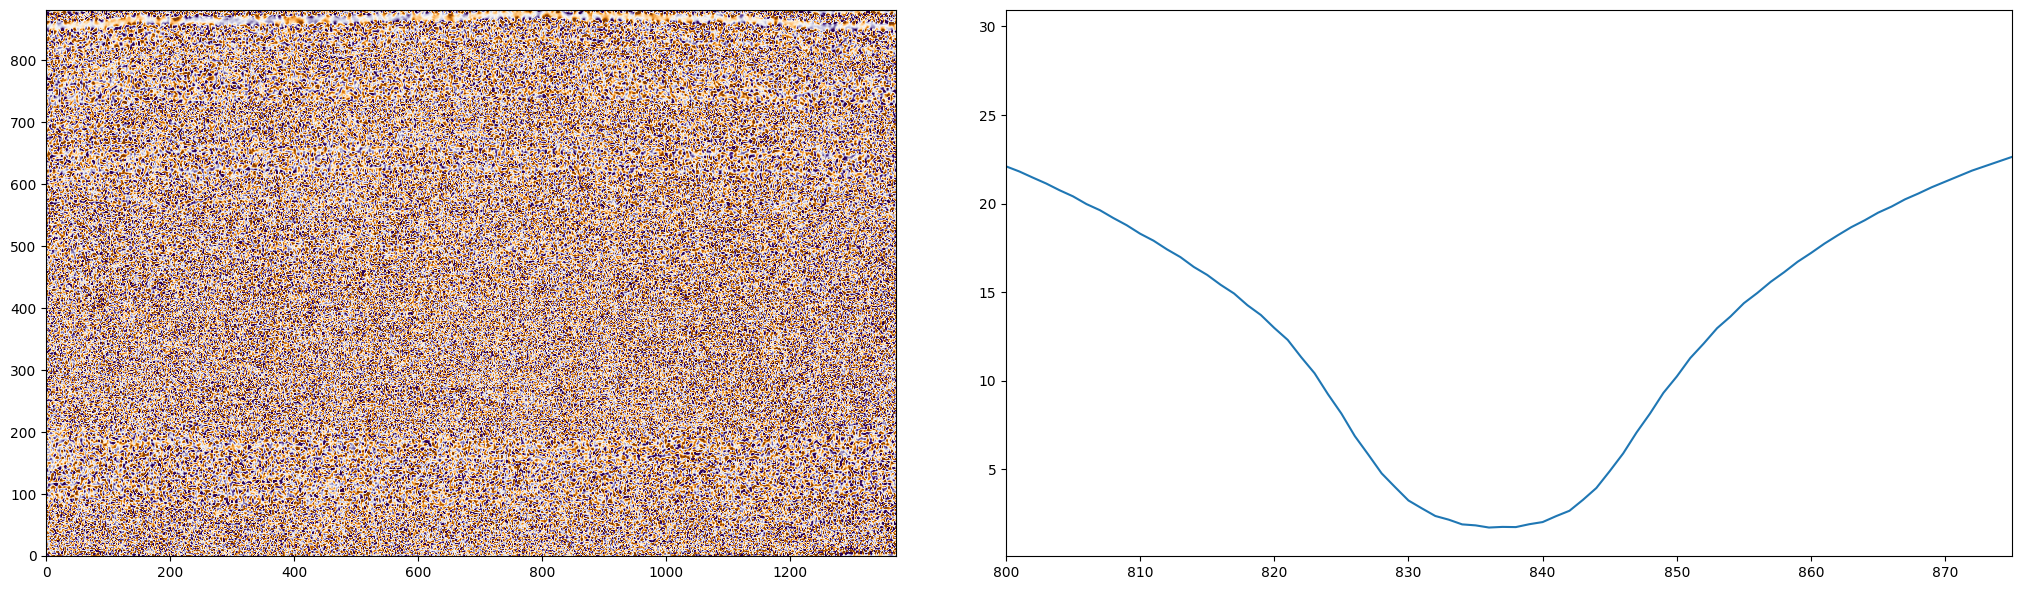

In [52]:
plt.figure(figsize=[21,6])
plt.ion()
plt.subplot(121)
plt.imshow(svt[:,:,750].T,origin='lower',cmap='PuOr',vmin=-0.03,vmax=0.03)

plt.subplot(122)
plt.plot(mean)
plt.xlim([800,875])
plt.tight_layout()